### Task 1 - Build Four Graph Variants
Using **the same base graph structure as in your written homework (the manual DFS/DFS exercise)**, construct:

- Weighted Directed graph
- Weighted Undirected graph
- Unweighted Undirected graph
- Unweighted Directed graph


Let’s define a small directed graph with 5 vertices (very demure, very petite) and these connections:  
0 -> 1   
0 -> 2    
1 -> 3    
2 -> 3    
3 -> 4   

For weighted one let's assign weights to the edges like  
0 -> 1 (2.5)  
0 -> 2 (1.0)  
1 -> 3 (3.5)  
2 -> 3 (2.0)  
3 -> 4 (4.5)  

In [119]:
from graph_factory import GraphFactory
from algorithmics import GraphAlgorithms

In [120]:
weighted_edges = [
    (0, 1, 2.5),
    (0, 2, 1.0),
    (1, 3, 3.5),
    (2, 3, 2.0),
    (3, 4, 4.5)
]

unweighted_edges = [(u, v, 1.0) for (u, v, _) in weighted_edges]

# Weighted directed
weighted_directed = GraphFactory.from_edges(vertices=5, edges=weighted_edges, directed=True)
print("Weighted Directed - Adjacency List:")
print(weighted_directed.get_adjacency_list())
print(weighted_directed.get_adjacency_matrix())
print()

# Weighted undirected Graph
weighted_undirected = GraphFactory.from_edges(vertices=5, edges=weighted_edges, directed=False)
print("Weighted Undirected - Adjacency List:")
print(weighted_undirected.get_adjacency_list())
print(weighted_undirected.get_adjacency_matrix())
print()

# Unweighted directed Graph
unweighted_directed = GraphFactory.from_edges(vertices=5, edges=unweighted_edges, directed=True)
print("Unweighted Directed - Adjacency List:")
print(unweighted_directed.get_adjacency_list())
print(unweighted_directed.get_adjacency_matrix())
print()

# Unweighted undirected Graph
unweighted_undirected = GraphFactory.from_edges(vertices=5, edges=unweighted_edges, directed=False)
print("Unweighted Undirected - Adjacency List:")
print(unweighted_undirected.get_adjacency_list())
print(unweighted_undirected.get_adjacency_matrix())
print()


Weighted Directed - Adjacency List:
{0: [(1, 2.5), (2, 1.0)], 1: [(3, 3.5)], 2: [(3, 2.0)], 3: [(4, 4.5)], 4: []}
[[0.0, 2.5, 1.0, 0.0, 0.0], [0.0, 0.0, 0.0, 3.5, 0.0], [0.0, 0.0, 0.0, 2.0, 0.0], [0.0, 0.0, 0.0, 0.0, 4.5], [0.0, 0.0, 0.0, 0.0, 0.0]]

Weighted Undirected - Adjacency List:
{0: [(1, 2.5), (2, 1.0)], 1: [(0, 2.5), (3, 3.5)], 2: [(0, 1.0), (3, 2.0)], 3: [(1, 3.5), (2, 2.0), (4, 4.5)], 4: [(3, 4.5)]}
[[0.0, 2.5, 1.0, 0.0, 0.0], [2.5, 0.0, 0.0, 3.5, 0.0], [1.0, 0.0, 0.0, 2.0, 0.0], [0.0, 3.5, 2.0, 0.0, 4.5], [0.0, 0.0, 0.0, 4.5, 0.0]]

Unweighted Directed - Adjacency List:
{0: [(1, 1.0), (2, 1.0)], 1: [(3, 1.0)], 2: [(3, 1.0)], 3: [(4, 1.0)], 4: []}
[[0.0, 1.0, 1.0, 0.0, 0.0], [0.0, 0.0, 0.0, 1.0, 0.0], [0.0, 0.0, 0.0, 1.0, 0.0], [0.0, 0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 0.0, 0.0]]

Unweighted Undirected - Adjacency List:
{0: [(1, 1.0), (2, 1.0)], 1: [(0, 1.0), (3, 1.0)], 2: [(0, 1.0), (3, 1.0)], 3: [(1, 1.0), (2, 1.0), (4, 1.0)], 4: [(3, 1.0)]}
[[0.0, 1.0, 1.0, 0.0, 0.0], [

### Task 2 - Apply Algorithms (BFS, DFS, Components, Stats)
After you implement the TODO's in algorithmics.py and the required representations in graph_abc.py:

For unweighted directed and undirected graphs:
1. Run BFS from a chosen start vertex (note your choice).
2. Run DFS from the same start vertex.
3. Compute connected components:
    - For undirected graphs: standard components.
    - For directed graphs: weakly connected components (ignore directions).

4. Compute component statistics: for each component, report
    - vertices (sorted),
    - node_count,
    - edge_count (count undirected edges once; count directed edges with both endpoints in the component),
    - smallest_vertex

#### Undirected graph

Let's add one more component to the list of edges

In [121]:
weighted_edges = [
    (0, 1, 2.5),
    (0, 2, 1.0),
    (1, 3, 3.5),
    (2, 3, 2.0),
    (3, 4, 4.5),
    (6, 5, 2.0),
    (5, 6, 2.0)
]
weighted_undirected = GraphFactory.from_edges(vertices=7, edges=weighted_edges, directed=False)

Evidently, BFS and DFS work only with vertices within reach

In [122]:
print("Adjacency list:")
print(weighted_undirected.get_adjacency_list())

bfs_undir = GraphAlgorithms.bfs(weighted_undirected, 0) # start from default vertex
dfs_undir = GraphAlgorithms.dfs(weighted_undirected, 0)
print("BFS order:", bfs_undir)
print("DFS order:", dfs_undir)
bfs_undir = GraphAlgorithms.bfs(weighted_undirected, 5)
dfs_undir = GraphAlgorithms.dfs(weighted_undirected, 5)
print("BFS order:", bfs_undir)
print("DFS order:", dfs_undir)

components_undir = GraphAlgorithms.connected_components(weighted_undirected)
print("Connected components:", components_undir)

stats_undir = GraphAlgorithms.components_with_stats(weighted_undirected)
print("Component statistics:")
for s in stats_undir:
    print(s)

Adjacency list:
{0: [(1, 2.5), (2, 1.0)], 1: [(0, 2.5), (3, 3.5)], 2: [(0, 1.0), (3, 2.0)], 3: [(1, 3.5), (2, 2.0), (4, 4.5)], 4: [(3, 4.5)], 5: [(6, 2.0)], 6: [(5, 2.0)]}
BFS order: [0, 1, 2, 3, 4]
DFS order: [0, 1, 3, 2, 4]
BFS order: [5, 6]
DFS order: [5, 6]
Connected components: [[0, 1, 2, 3, 4], [5, 6]]
Component statistics:
{'vertices': [0, 1, 2, 3, 4], 'node_count': 5, 'edge_count': 5, 'smallest_vertex': 0}
{'vertices': [5, 6], 'node_count': 2, 'edge_count': 1, 'smallest_vertex': 5}


#### Directed graph

In [123]:
weighted_edges = [
    (0, 1, 2.5),
    (0, 2, 1.0),
    (1, 3, 3.5),
    (2, 3, 2.0),
    (3, 4, 4.5),
    (6, 5, 2.0),
    (5, 6, 4.0),
    
]
weighted_directed = GraphFactory.from_edges(vertices=7, edges=weighted_edges, directed=True)

In [124]:
print("Adjacency list:")
print(weighted_directed.get_adjacency_list())

bfs_undir = GraphAlgorithms.bfs(weighted_directed, 0) # start from default vertex
dfs_undir = GraphAlgorithms.dfs(weighted_directed, 0)
print("BFS order:", bfs_undir)
print("DFS order:", dfs_undir)

components_undir = GraphAlgorithms.connected_components(weighted_directed)
print("Connected components:", components_undir)

stats_undir = GraphAlgorithms.components_with_stats(weighted_directed)
print("Component statistics:")
for s in stats_undir:
    print(s)

Adjacency list:
{0: [(1, 2.5), (2, 1.0)], 1: [(3, 3.5)], 2: [(3, 2.0)], 3: [(4, 4.5)], 4: [], 5: [(6, 4.0)], 6: [(5, 2.0)]}
BFS order: [0, 1, 2, 3, 4]
DFS order: [0, 1, 3, 4, 2]
Connected components: [[0, 1, 2, 3, 4], [5, 6]]
Component statistics:
{'vertices': [0, 1, 2, 3, 4], 'node_count': 5, 'edge_count': 5, 'smallest_vertex': 0}
{'vertices': [5, 6], 'node_count': 2, 'edge_count': 2, 'smallest_vertex': 5}


### Task 3 - Visualize One Graph with NetworkX
Pick any one of the four graphs (the most interesting one) and draw it using NetworkX.

In [125]:
!pip install networkx 

In [126]:
import networkx as nx
import matplotlib.pyplot as plt

In [127]:
weighted_edges = [
    (0, 1, 2.5),
    (0, 2, 1.0),
    (1, 3, 3.5),
    (2, 3, 2.0),
    (3, 4, 4.5),
    (6, 5, 2.0), 
    (5, 6, 4.0),
    (2, 4, 3.0)
]
weighted_directed = GraphFactory.from_edges(vertices=7, edges=weighted_edges, directed=True)

In [128]:
def visualize_graph(graph, title="Graph Visualization"):
    adj = graph.get_adjacency_list()
    G = nx.DiGraph() if graph.directed else nx.Graph()

    # Add edges
    for u, neighbors in adj.items():
        for v, _ in neighbors:
            G.add_edge(u, v)

    pos = nx.spring_layout(G, seed=42)  # fixed layout for consistency
    plt.figure(figsize=(6, 4))
    nx.draw_networkx_nodes(G, pos, node_color="hotpink", node_size=200, edgecolors="black")
    nx.draw_networkx_labels(G, pos, font_size=10, font_color="white")
    if graph.directed:
        nx.draw_networkx_edges(G, pos, arrowstyle="->", arrowsize=15, edge_color="pink")
    else:
        nx.draw_networkx_edges(G, pos, edge_color="pink")
    plt.title(title, fontsize=14)
    plt.axis("off")
    plt.show()

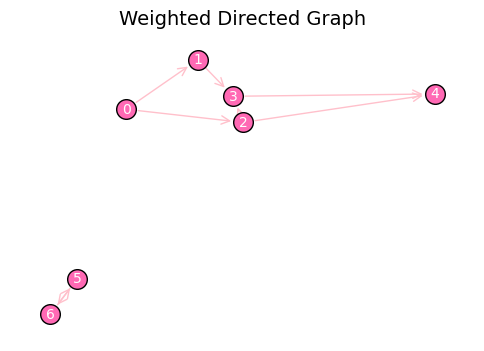

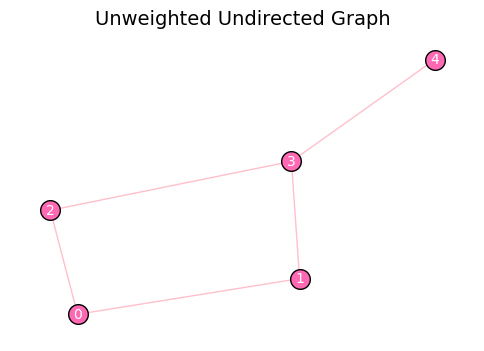

In [129]:
visualize_graph(weighted_directed, "Weighted Directed Graph")
visualize_graph(unweighted_undirected, "Unweighted Undirected Graph") # Yes, that is Ursa Major

I wanted to draw something. Could not do dog etc. or something more complicated, so I PRESENT TO YOU 

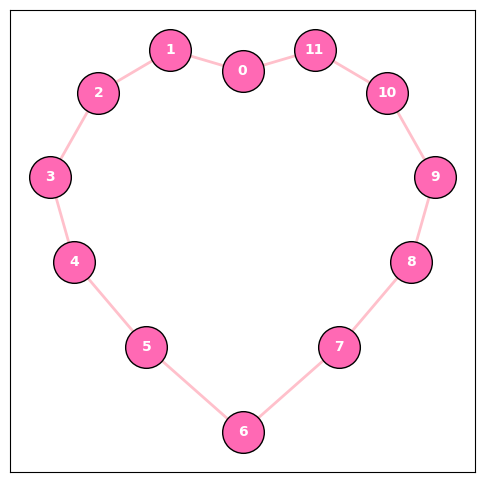

In [130]:
vertices = 12
edges = [
    (0, 1, 1.0), (1, 2, 1.0), (2, 3, 1.0), (3, 4, 1.0), (4, 5, 1.0),
    (5, 6, 1.0), (6, 7, 1.0), (7, 8, 1.0), (8, 9, 1.0),
    (9, 10, 1.0), (10, 11, 1.0), (11, 0, 1.0)
]

heart_graph = GraphFactory.from_edges(vertices, edges, directed=False)

pos = {
    0: (0, 0.9),
    1: (-0.3, 1.0),
    2: (-0.6, 0.8),
    3: (-0.8, 0.4),
    4: (-0.7, 0.0),
    5: (-0.4, -0.4),
    6: (0, -0.8),
    7: (0.4, -0.4),
    8: (0.7, 0.0),
    9: (0.8, 0.4),
    10: (0.6, 0.8),
    11: (0.3, 1.0)
}

G = nx.Graph()
for u, neighbors in heart_graph.get_adjacency_list().items():
    for v, _ in neighbors:
        G.add_edge(u, v)

plt.figure(figsize=(6, 6))
nx.draw_networkx_nodes(G, pos, node_color="hotpink", node_size=900, edgecolors="black")
nx.draw_networkx_edges(G, pos, width=2.0, edge_color="pink")
nx.draw_networkx_labels(G, pos, font_color="white", font_weight="bold", font_size=10)
plt.show()
